<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-функции" data-toc-modified-id="Анализ-функции-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ функции</a></span></li><li><span><a href="#Метод-простых-итераций" data-toc-modified-id="Метод-простых-итераций-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Метод простых итераций</a></span></li><li><span><a href="#Метод-Ньютона" data-toc-modified-id="Метод-Ньютона-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Метод Ньютона</a></span></li></ul></div>

# Анализ функции

In [1]:
from math import log2, log
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 2 ** x - x ** 2 - 0.5

def df(x):
    return 2 ** x * log(2) - 2 * x

def ddf(x):
    return 2 ** x * log(2) ** 2 - 2

a = -3
b = 5

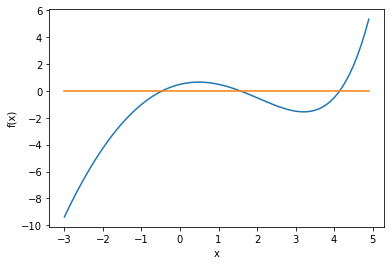

In [3]:
t = np.arange(a, b, 0.1)
y1 = np.array([f(i) for i in t])
y2 = np.array([0 for i in t])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(t,y1)
plt.plot(t,y2)

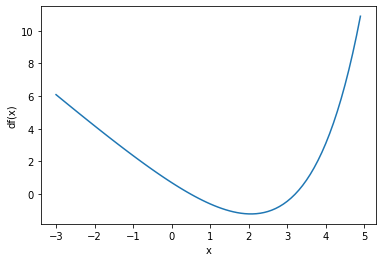

In [4]:
# график 1 производной на отрезке -3:5
y = np.array([df(i) for i in t])
plt.xlabel('x')
plt.ylabel('df(x)')
plt.plot(t,y)

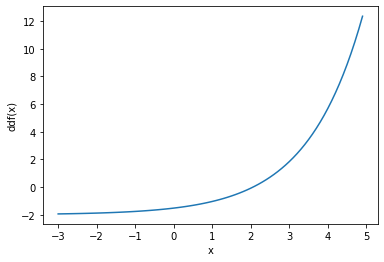

In [5]:
# график 2 производной на отрезке -3:5
y = np.array([ddf(i) for i in t])
plt.xlabel('x')
plt.ylabel('ddf(x)')
plt.plot(t,y)


# Метод простых итераций

In [6]:
# преобразуем к эквивалентному виду
def phi(x):
    return log(x ** 2 + 0.5) / log(2)

def dphi(x):
    return 2 * x / (log(2) * (x ** 2 + 0.5))

def get_q(a, b):
    return max(abs(dphi(a)), abs(dphi(b)))


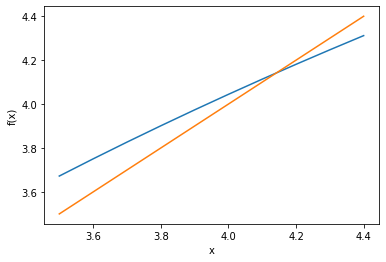

In [7]:
# отделение корней
a = 3.5
b = 4.5
t = np.arange(a, b, 0.1)
y1 = np.array([phi(i) for i in t])
y2 = np.array([i for i in t])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(t,y1)
plt.plot(t,y2)
# корень на отрезке единтсвенный, phi(x) принадлежит отрезку

In [8]:
get_q(a, b)

0.7920678655860977

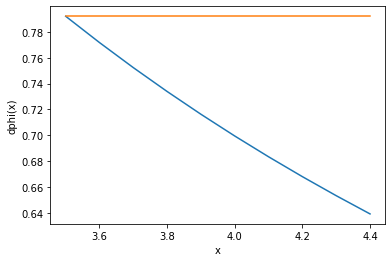

In [9]:
y1 = np.array([abs(dphi(i)) for i in t])
y2 = np.array([get_q(a, b) for i in t])
plt.xlabel('x')
plt.ylabel('dphi(x)')
plt.plot(t,y1)
plt.plot(t,y2)
# условия теоремы выполнены, оставляем отрезок и phi

In [10]:
def simple_iteration(a, b, eps):
    x_prev = (a + b) / 2
    q = get_q(a, b)
    k = 0
    
    while True:
        k += 1
        x = phi(x_prev)
        finish = abs(x - x_prev) * q / (1 - q)
        if finish <= eps:
            break
        x_prev = x
    return x, k
        

In [11]:
simple_iteration(a, b, 0.001)

(4.141880133572951, 15)

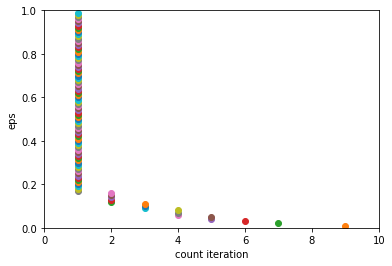

In [12]:
# зависимость от кл-ва итераций
point = {i : [simple_iteration(a, b, i * 0.01)[1], i * 0.01] for i in range(100) }
for i in point:
    plt.scatter(*point[i] )
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.xlabel('count iteration')
plt.ylabel('eps')
plt.show()

# Метод Ньютона

In [13]:
# проверим единтственность корня
a = 3.5
b = 4.5
f(a) * f(b) < 0

True

In [14]:
# в качесвте начального приближения возмём b
x_0 = b
f(b) * ddf(b) > 0

True

In [15]:
def newton(a, b, eps):
    x_prev = b
    k = 0
    
    while True:
        k += 1
        x = x_prev - f(x_prev) / df(x_prev)
        finish = abs(f(x) - f(x_prev))
        if finish < eps:
            break
        x_prev = x
    return x, k

In [18]:
newton(a ,b, 0.001)

(4.142309563249479, 4)

In [ ]:
print(newton(a ,b, 0.001))
print(newton(a ,b, 0.001))
